### LSE Data Analytics Online Career Accelerator 
# Course 301: Advanced Analytics for Organisational Impact

## Practical activity: Finding the return for S&P 500 stocks

**This is the solution to the activity.**

As you have learned so far, CAPM describes the relationship between systematic risk and expected return for assets, primarily stocks. Using the CAPM, you can – given that investment’s characteristics, which are often values to plug into an equation or model – find the expected return of an investment. 

Yuki has started a position as a data analyst at a trusted investment bank. She’s been tasked with finding the expected returns of two of the top S&P 500 listed companies: Microsoft and Tesla. The bank's clientele want to know which of the two companies has stronger expected stock returns based on historical data, namely 2020 and 2021. 

In this activity you will use CAPM to help Yuki find the expected returns for Microsoft (MSFT) and Tesla Inc. (TSLA), based on data from 2020 and 2021. You will retrieve the historical data from Yahoo! Finance and find the variables for the CAPM equation, including:

- the current average excess annual return of the US stocks on the S&P 500 (SPY)
- the return on 10-year US Treasury bonds 
- the beta value for each stock. (Hint: You will need to find the first two values online.)

After calculating the CAPM of each stock, make a statement on which has better-expected returns and which has a lower level of volatility.

## 1. Prepare your workstation

In [4]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn
import matplotlib.pyplot as plt
import datetime
import time

from sklearn.linear_model import LinearRegression
# Install Pandas ‘DataReader’. 
!pip install pandas-datareader 

# Import data from the web from ‘pandas_datareader’. 
from pandas_datareader import data as web  

## 2. Set the start and end date

In [5]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2022,1,1)

## 3.1 Pull data for Tesla from Yahoo! Finance and save as a DataFrame

In [6]:
df_spy = web.DataReader('SPY','yahoo',start,end)

df_spy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,312.395020
2020-01-03,323.640015,321.100006,321.160004,322.410004,77709700.0,310.029541
2020-01-06,323.730011,320.359985,320.489990,323.640015,55653900.0,311.212280
2020-01-07,323.540009,322.239990,323.019989,322.730011,40496400.0,310.337250
2020-01-08,325.779999,322.670013,322.940002,324.450012,68296000.0,311.991180


In [7]:
df_tesla = web.DataReader('TSLA','yahoo',start,end)

df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001


## 3.2 Check relationships and cumulative returns

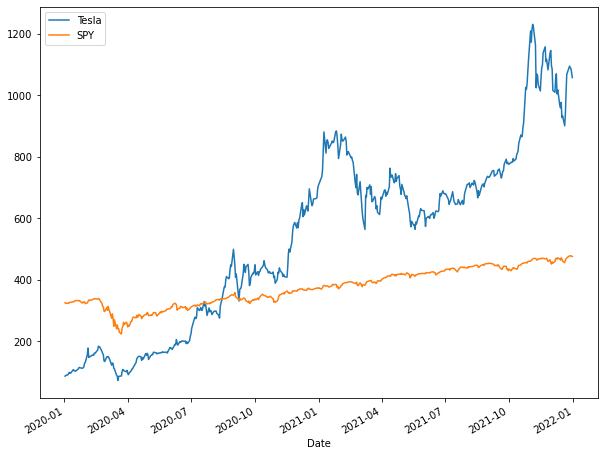

In [8]:
# Plot the data (Close) for both stocks.
df_tesla['Close'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

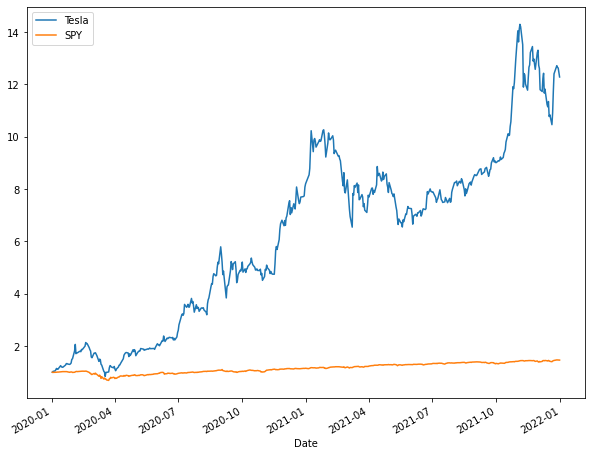

In [9]:
df_tesla['Cumu'] = df_tesla['Close']/df_tesla['Close'].iloc[0] 
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

df_tesla['Cumu'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

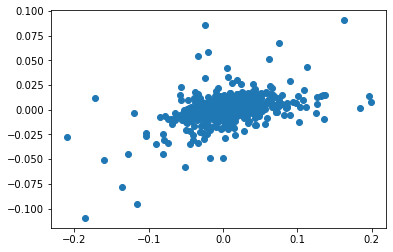

In [10]:
df_tesla['daily_ret'] = df_tesla['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)
plt.scatter(df_tesla['daily_ret'],df_spy['daily_ret'])

## 3.3 Drawing the trend line

In [11]:
daily_prices = pd.concat([df_tesla['Close'], df_spy['Close']], axis=1)
daily_prices.columns = ['Tesla', 'SPY']

print(daily_prices.head())

                Tesla         SPY
Date                             
2020-01-02  86.052002  324.869995
2020-01-03  88.601997  322.410004
2020-01-06  90.307999  323.640015
2020-01-07  93.811996  322.730011
2020-01-08  98.428001  324.450012


In [12]:
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0) 
print(clean_daily_returns.head())

               Tesla       SPY
Date                          
2020-01-03  0.029633 -0.007572
2020-01-06  0.019255  0.003815
2020-01-07  0.038801 -0.002812
2020-01-08  0.049205  0.005330
2020-01-09 -0.021945  0.006781


# 3.4 Linear regression analysis

In [13]:
X = clean_daily_returns['SPY'].values.reshape(-1, 1)
y = clean_daily_returns['Tesla'].values.reshape(-1, 1)

In [14]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [15]:
lr.coef_

array([[1.34497477]])

In [16]:
lr.intercept_

array([0.00489288])

## 3.5 Drawing the line of best fit

In [17]:
# x coef: 1.34497477
# Constant coef: 0.00489288.
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏.
y_pred =  lr.coef_ * X + lr.intercept_
y_pred

array([[-5.29158229e-03],
       [ 1.00240296e-02],
       [ 1.11111109e-03],
       [ 1.20609722e-02],
       [ 1.40126826e-02],
       [ 1.02243957e-03],
       [ 1.41427394e-02],
       [ 2.84230175e-03],
       [ 7.93233145e-03],
       [ 1.60808994e-02],
       [ 9.07915625e-03],
       [ 2.25915149e-03],
       [ 5.05530291e-03],
       [ 6.43539587e-03],
       [-7.06808630e-03],
       [-1.66662716e-02],
       [ 1.89871130e-02],
       [ 3.78189704e-03],
       [ 9.25780013e-03],
       [-1.95290414e-02],
       [ 1.48840790e-02],
       [ 2.53920129e-02],
       [ 2.04246613e-02],
       [ 9.41852595e-03],
       [-2.27537301e-03],
       [ 1.49335521e-02],
       [ 7.22378891e-03],
       [ 1.35582459e-02],
       [ 3.45783758e-03],
       [ 7.04768360e-03],
       [ 1.42688110e-03],
       [ 1.13235213e-02],
       [-6.32607302e-04],
       [-8.95802870e-03],
       [-3.97137439e-02],
       [-3.58627461e-02],
       [-5.42256823e-05],
       [-5.55122039e-02],
       [-7.5

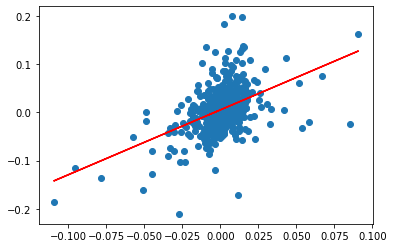

In [18]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')

## 4 Pull data for Microsoft from Yahoo! Finance and save as a DataFrame

In [19]:
df_msoft = web.DataReader('MSFT','yahoo',start,end)
df_msoft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,160.729996,158.330002,158.779999,160.619995,22622100.0,156.924377
2020-01-03,159.949997,158.059998,158.320007,158.619995,21116200.0,154.970383
2020-01-06,159.100006,156.509995,157.080002,159.029999,20813700.0,155.370987
2020-01-07,159.669998,157.320007,159.320007,157.580002,21634100.0,153.954315
2020-01-08,160.800003,157.949997,158.929993,160.089996,27746500.0,156.406601


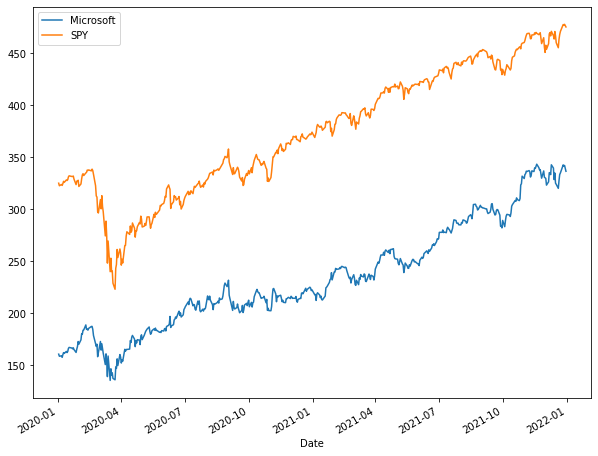

In [20]:
df_msoft['Close'].plot(label = 'Microsoft', figsize=(10, 8))
df_spy['Close'].plot(label = 'SPY')
plt.legend()

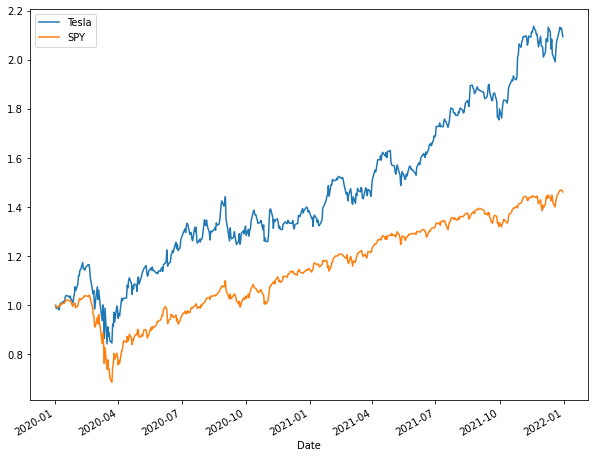

In [21]:
df_msoft['Cumu'] = df_msoft['Close']/df_msoft['Close'].iloc[0] 
df_spy['Cumu'] = df_spy['Close']/df_spy['Close'].iloc[0]

df_msoft['Cumu'].plot(label = 'Tesla', figsize=(10, 8))
df_spy['Cumu'].plot(label = 'SPY')
plt.legend()

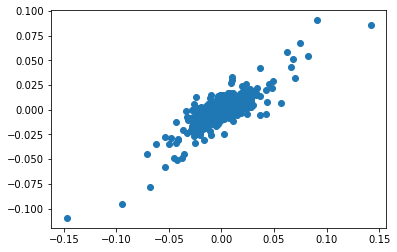

In [22]:
df_msoft['daily_ret'] = df_msoft['Close'].pct_change(1)
df_spy['daily_ret'] = df_spy['Close'].pct_change(1)
plt.scatter(df_msoft['daily_ret'],df_spy['daily_ret'])

In [23]:
daily_prices = pd.concat([df_msoft['Close'], df_spy['Close']], axis=1)
daily_prices.columns = ['Microsoft', 'SPY']

print(daily_prices.head())

             Microsoft         SPY
Date                              
2020-01-02  160.619995  324.869995
2020-01-03  158.619995  322.410004
2020-01-06  159.029999  323.640015
2020-01-07  157.580002  322.730011
2020-01-08  160.089996  324.450012


In [24]:
daily_returns = daily_prices.pct_change(1)
print(daily_returns.head())

            Microsoft       SPY
Date                           
2020-01-02        NaN       NaN
2020-01-03  -0.012452 -0.007572
2020-01-06   0.002585  0.003815
2020-01-07  -0.009118 -0.002812
2020-01-08   0.015928  0.005330


In [25]:
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0) 
print(clean_daily_returns.head())

            Microsoft       SPY
Date                           
2020-01-03  -0.012452 -0.007572
2020-01-06   0.002585  0.003815
2020-01-07  -0.009118 -0.002812
2020-01-08   0.015928  0.005330
2020-01-09   0.012493  0.006781


In [26]:
X = clean_daily_returns['SPY'].values.reshape(-1, 1)
y = clean_daily_returns['Microsoft'].values.reshape(-1, 1)

In [27]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [28]:
lr.coef_

array([[1.14398066]])

In [29]:
lr.intercept_

array([0.00069205])

In [30]:
# x coef: 1.14398066
# Constant coef: 0.00069205
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred =  lr.coef_ * X + lr.intercept_
y_pred

array([[-7.97043553e-03],
       [ 5.05639903e-03],
       [-2.52456578e-03],
       [ 6.78893926e-03],
       [ 8.44898457e-03],
       [-2.59998616e-03],
       [ 8.55960550e-03],
       [-1.05208564e-03],
       [ 3.27728593e-03],
       [ 1.02081253e-02],
       [ 4.25272831e-03],
       [-1.54808946e-03],
       [ 8.30202844e-04],
       [ 2.00405361e-03],
       [-9.48145736e-03],
       [-1.76452821e-02],
       [ 1.26800321e-02],
       [-2.52904227e-04],
       [ 4.40467551e-03],
       [-2.00802373e-02],
       [ 9.19015876e-03],
       [ 1.81277786e-02],
       [ 1.39027520e-02],
       [ 4.54138233e-03],
       [-5.40497098e-03],
       [ 9.23223851e-03],
       [ 2.67462856e-03],
       [ 8.06245920e-03],
       [-5.28535981e-04],
       [ 2.52484056e-03],
       [-2.25598470e-03],
       [ 6.16169362e-03],
       [-4.00770150e-03],
       [-1.10889652e-02],
       [-3.72485217e-02],
       [-3.39730201e-02],
       [-3.51575370e-03],
       [-5.06860472e-02],
       [-4.1

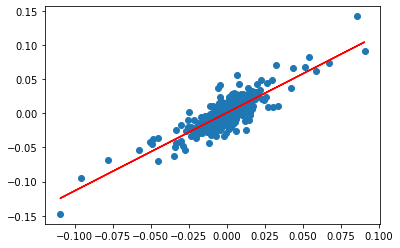

In [31]:
plt.scatter(X,y)
plt.plot(X, y_pred, color='red')